In [1]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
Note: you may need to restart the kernel to use updated packages.
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv('AirPassenger.csv')
df.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [5]:
df.index= pd.to_datetime(df['Year-Month'])
df.drop('Year-Month',axis=1, inplace=True)
print(df.dtypes)
df

Pax    int64
dtype: object


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


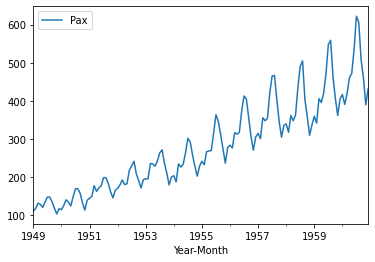

In [6]:
df.plot()


In [7]:
dfpct=df['Pax'].pct_change()
dfpct

Year-Month
1949-01-01         NaN
1949-02-01    0.053571
1949-03-01    0.118644
1949-04-01   -0.022727
1949-05-01   -0.062016
                ...   
1960-08-01   -0.025723
1960-09-01   -0.161716
1960-10-01   -0.092520
1960-11-01   -0.154013
1960-12-01    0.107692
Name: Pax, Length: 144, dtype: float64

In [8]:
dfpct.autocorr()

0.1712697481863574

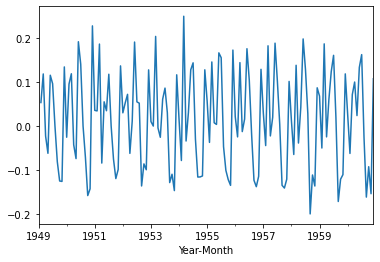

In [9]:
dfpct.plot()

In [10]:
df=pd.read_csv('drsi1.csv')
df

,date,value
0,1988 JAN,NaN
1,1988 FEB,NaN
2,1988 MAR,NaN
3,1988 APR,NaN
4,1988 MAY,NaN
...,...,...
399,2021 APR,2.7
400,2021 MAY,-3.5
401,2021 JUN,0.3
402,2021 JUL,1.5


In [11]:
df['date']=df['date'].astype('datetime64[ns]')
df

,date,value
0,1988-01-01,NaN
1,1988-02-01,NaN
2,1988-03-01,NaN
3,1988-04-01,NaN
4,1988-05-01,NaN
...,...,...
399,2021-04-01,2.7
400,2021-05-01,-3.5
401,2021-06-01,0.3
402,2021-07-01,1.5


In [12]:
df.index= df['date']
df.drop('date',axis=1,inplace=True)
df

,value
date,
1988-01-01,NaN
1988-02-01,NaN
1988-03-01,NaN
1988-04-01,NaN
1988-05-01,NaN
...,...
2021-04-01,2.7
2021-05-01,-3.5
2021-06-01,0.3


In [13]:
df.isna().sum()

value    12
dtype: int64

In [14]:
df.dropna(inplace=True)
print(df.isna().sum())

value    0
dtype: int64


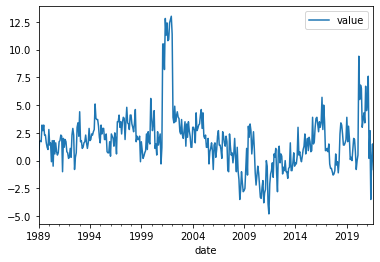

In [15]:
df.plot()


In [75]:
from pandas import read_csv
series = read_csv('champagne.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 93, Validation 12


In [5]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=5428.000, Expected=8314
>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2

In [10]:
print(len(train))
print(len(test))

46
47


In [14]:
print(train)
print(test)

[2815. 2672. 2755. 2721. 2946. 3036. 2282. 2212. 2922. 4301. 5764. 7312.
 2541. 2475. 3031. 3266. 3776. 3230. 3028. 1759. 3595. 4474. 6838. 8357.
 3113. 3006. 4047. 3523. 3937. 3986. 3260. 1573. 3528. 5211. 7614. 9254.
 5375. 3088. 3718. 4514. 4520. 4539. 3663. 1643. 4739. 5428.]
[ 8314. 10651.  3633.  4292.  4154.  4121.  4647.  4753.  3965.  1723.
  5048.  6922.  9858. 11331.  4016.  3957.  4510.  4276.  4968.  4677.
  3523.  1821.  5222.  6872. 10803. 13916.  2639.  2899.  3370.  3740.
  2927.  3986.  4217.  1738.  5221.  6424.  9842. 13076.  3934.  3162.
  4286.  4676.  5010.  4874.  4633.  1659.  5951.]


In [19]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    
print(predictions)

[5428.0, 8314.0, 10651.0, 3633.0, 4292.0, 4154.0, 4121.0, 4647.0, 4753.0, 3965.0, 1723.0, 5048.0, 6922.0, 9858.0, 11331.0, 4016.0, 3957.0, 4510.0, 4276.0, 4968.0, 4677.0, 3523.0, 1821.0, 5222.0, 6872.0, 10803.0, 13916.0, 2639.0, 2899.0, 3370.0, 3740.0, 2927.0, 3986.0, 4217.0, 1738.0, 5221.0, 6424.0, 9842.0, 13076.0, 3934.0, 3162.0, 4286.0, 4676.0, 5010.0, 4874.0, 4633.0, 1659.0]


In [20]:
from pandas import read_csv
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64


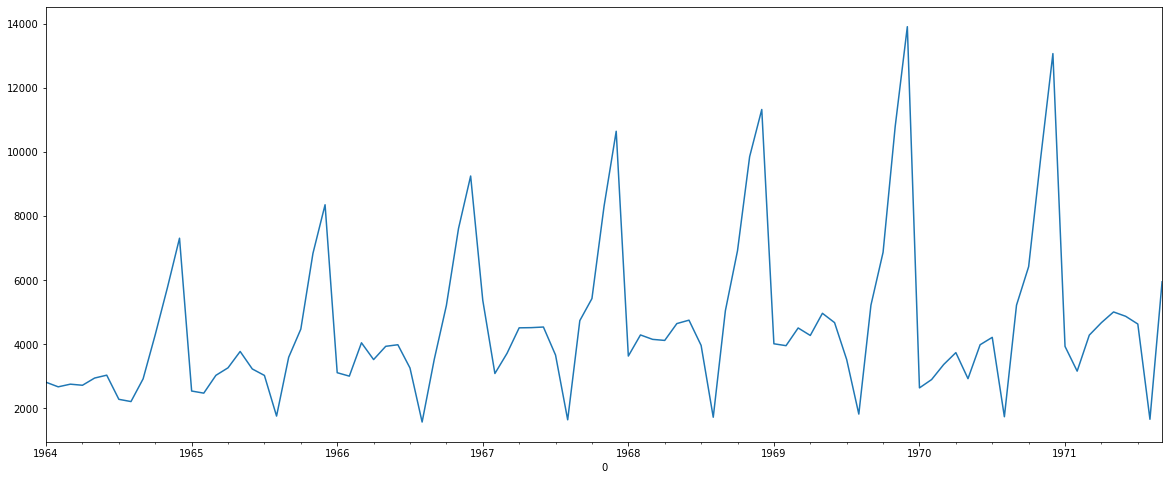

In [27]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series.plot(figsize=(20,8))
pyplot.show()

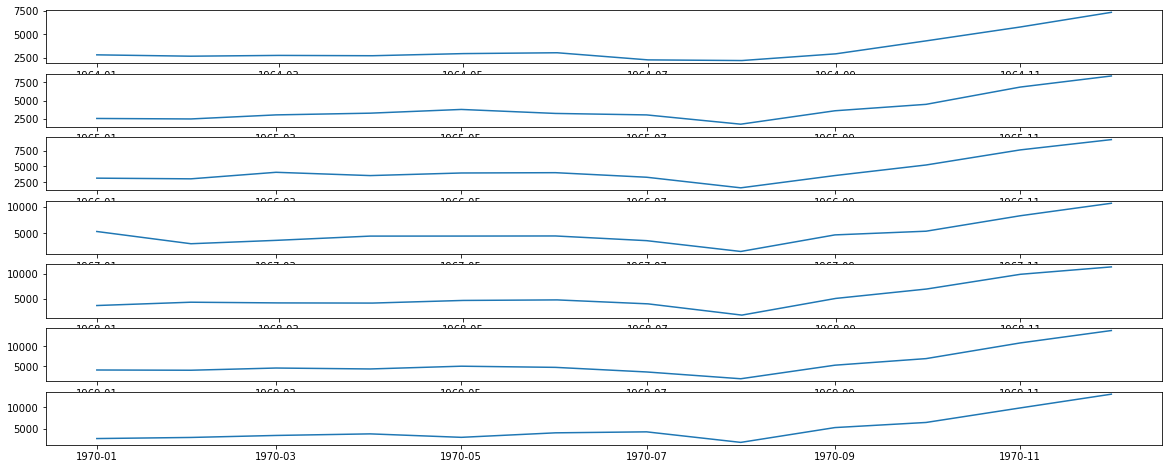

In [37]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure(figsize=(20,8))
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

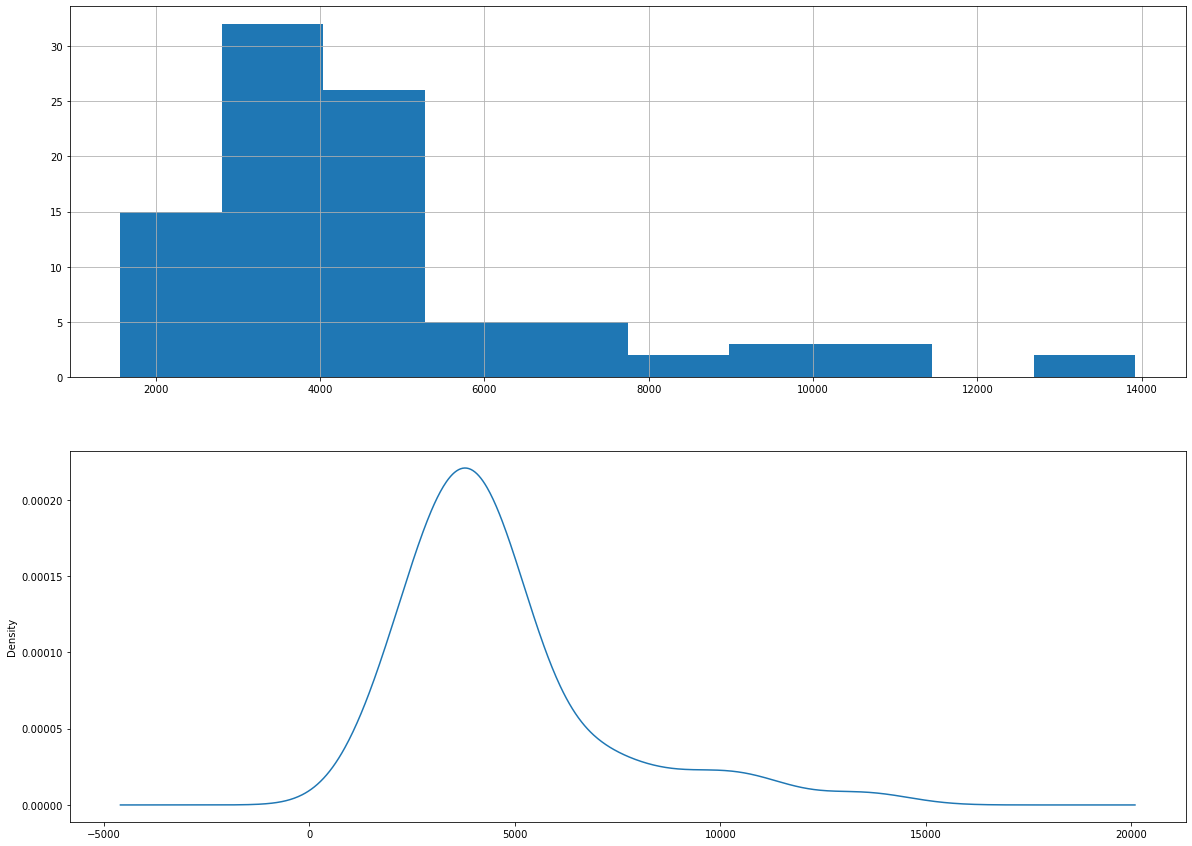

In [44]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1,figsize=(20,15))
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

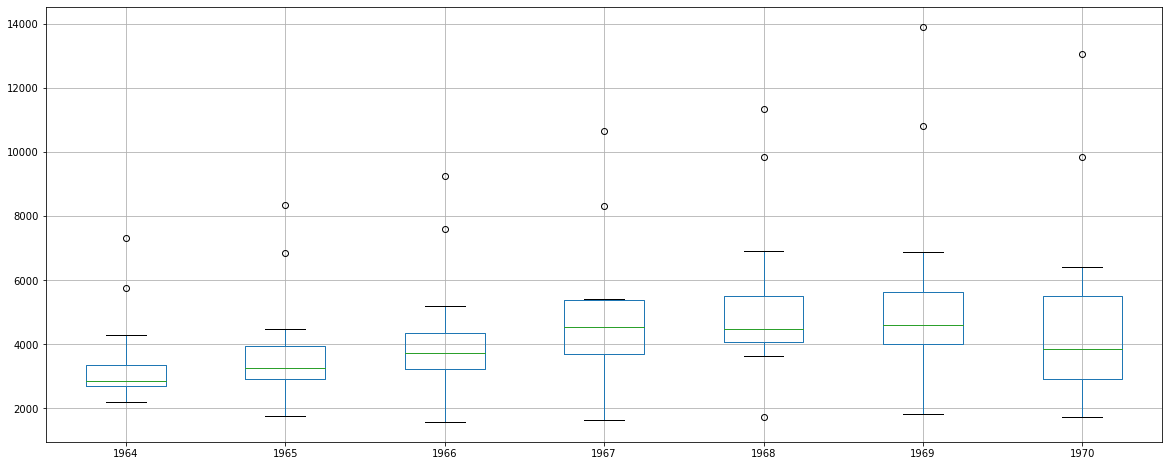

In [41]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot(figsize=(20,8))
pyplot.show()

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


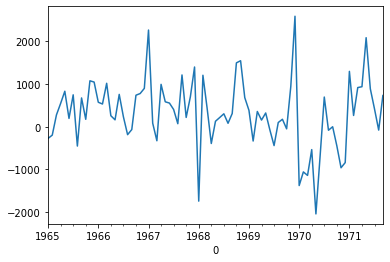

In [46]:
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv', header=False)
# plot
stationary.plot()
pyplot.show()

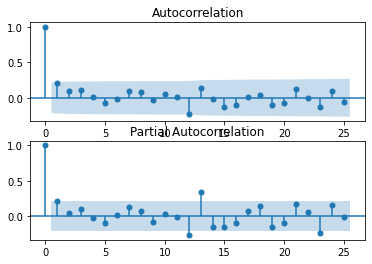

In [47]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv('stationary.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca())
pyplot.show()

In [51]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
# predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=8089.839, Expected=8314.000
>Predicted=9742.805, Expected=10651.000
>Predicted=5986.917, Expected=3633.000
>Predicted=3886.933, Expected=4292.000
>Predicted=4038.077, Expected=4154.000
>Predicted=4992.356, Expected=4121.000
>Predicted=5156.459, Expected=4647.000
>Predicted=5046.649, Expected=4753.000
>Predicted=4143.790, Expected=3965.000
>Predicted=2102.954, Expected=1723.000
>Predicted=5228.313, Expected=5048.000
>Predicted=5873.391, Expected=6922.000
>Predicted=8571.324, Expected=9858.000
>Predicted=11006.096, Expected=11331.000
>Predicted=4087.492, Expected=4016.000
>Predicted=4771.845, Expected=3957.000
>Predicted=4676.163, Expected=4510.000
>Predicted=4583.382, Expected=4276.000
>Predicted=5117.323, Expected=4968.000
>Predicted=5208.138, Expected=4677.000
>Predicted=4436.432, Expected=3523.000
>Predicted=2180.999, Expected=1821.000
>Predicted=5471.242, Expected=5222.000
>Predicted=7337.577, Expected=6872.000
>Predicted=10268.376, Expected=10803.000
>Predicted=11725.354

In [52]:
yhat

array([5404.42757343])

In [56]:
len(history)

93

In [54]:
history[-12]-yhat

array([1019.57242657])

In [58]:
len(train)

46

# residual stats


                 0
count    47.000000
mean    165.904733
std     934.696245
min   -2164.247347
25%    -289.651647
50%     191.759612
75%     732.992174
max    2367.304896


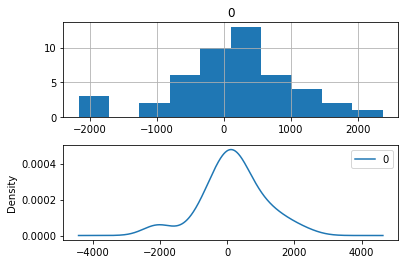

In [63]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
# predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 924.699
                 0
count    47.000000
mean      0.000005
std     934.696245
min   -2330.152075
25%    -455.556375
50%      25.854884
75%     567.087446
max    2201.400168


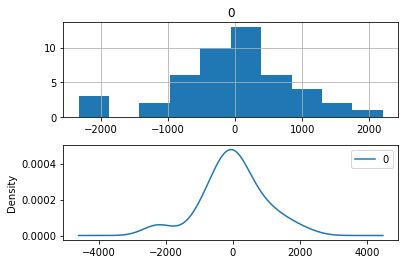

In [65]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 165.904728
for i in range(len(test)):
# difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
# predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

                 0
count    47.000000
mean    165.904733
std     934.696245
min   -2164.247347
25%    -289.651647
50%     191.759612
75%     732.992174
max    2367.304896


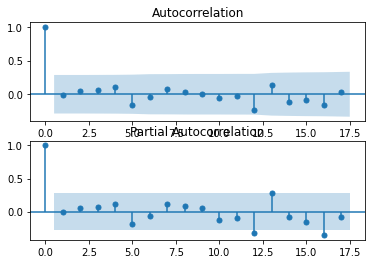

In [66]:
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
# predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [70]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [72]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 6794.773


>Predicted=6794.773, Expected=6981.000
>Predicted=10101.763, Expected=9851.000
>Predicted=13219.067, Expected=12670.000
>Predicted=3996.535, Expected=4348.000
>Predicted=3465.934, Expected=3564.000
>Predicted=4522.683, Expected=4577.000
>Predicted=4901.336, Expected=4788.000
>Predicted=5190.094, Expected=4618.000
>Predicted=4930.190, Expected=5312.000
>Predicted=4944.785, Expected=4298.000
>Predicted=1699.409, Expected=1413.000
>Predicted=6085.324, Expected=5877.000
RMSE: 361.110


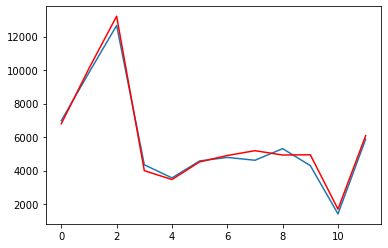

In [76]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load and prepare datasets
dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
# difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
# predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
# observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()